In [5]:
import torch
import numpy as np
from models import Generator, Encoder
import torchvision.utils as vutils
import matplotlib.pyplot as plt

Helper function

In [6]:
def visualize_images(images):
    plt.figure(figsize=(16, 8))
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(images, padding=2, normalize=True).cpu(), (1, 2, 0)))
    plt.show()

Determine device for acceleration, set ngpu to 1 if you have cuda capable GPU

In [7]:
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print('Using device:', device)

Using device: cuda:0


Initialize generator and import weights

In [8]:
generator = Generator().to(device)
state_dict = torch.load('../../trained_models/flowers_generator_final', map_location=device)
generator.load_state_dict(state_dict)
generator.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(1044, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
  

Specify Prompt

In [9]:
prompt = "the flower is a cone shape with many small red petals and few large green sepals."

How many images at once? Multiples of 8 are recommended

In [10]:
n_images = 16

Run this code cell to generate images

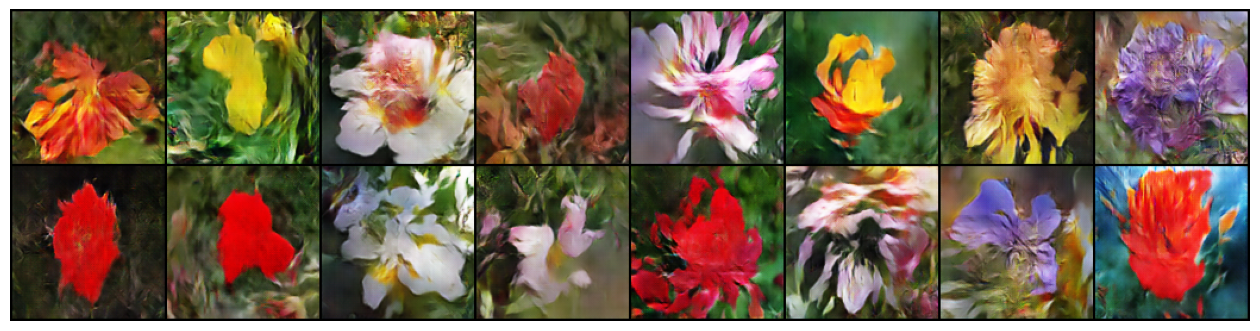

In [15]:
encoded_prompts = Encoder.encode_prompt([prompt] * n_images, device=device)
encoded_prompts = torch.reshape(encoded_prompts, (*encoded_prompts.shape, 1, 1))
latent_vec = torch.randn(n_images, 100, 1, 1, device=device)
fake_images = generator(latent_vec, encoded_prompts)
fake_images = (fake_images + 1) / 2
fake_images = fake_images.cpu()
visualize_images(fake_images)